<a href="https://colab.research.google.com/github/AfkarSiddiq/VisualisasiData/blob/main/Tugas4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tugas 4 Praktikum Visualisasi Data**



*   Nama   : M. Afkar Siddiq
*   NPM    : 2008107010030
*   Dataset : WHO Suicide Statistic



# **EDA (Exploratory data Analysis)**

Import primary moduls 

In [ ]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from PIL import Image
import urllib

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/AfkarSiddiq/VisualisasiData/main/who_suicide_statistics.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [ ]:
df.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [ ]:
df.tail()

,country,year,sex,age,suicides_no,population
43771,Zimbabwe,1990,male,25-34 years,150.0,NaN
43772,Zimbabwe,1990,male,35-54 years,132.0,NaN
43773,Zimbabwe,1990,male,5-14 years,6.0,NaN
43774,Zimbabwe,1990,male,55-74 years,74.0,NaN
43775,Zimbabwe,1990,male,75+ years,13.0,NaN


# **Filtering**

we will Replace missing values with 0 using *df.fillna(0)*

In [ ]:
df = df.fillna(0)

df.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,0.0,277900.0
1,Albania,1985,female,25-34 years,0.0,246800.0
2,Albania,1985,female,35-54 years,0.0,267500.0
3,Albania,1985,female,5-14 years,0.0,298300.0
4,Albania,1985,female,55-74 years,0.0,138700.0


Here, we will drop 'age' and 'sex' columns with *df.drop()*

In [ ]:
df.drop(['age', 'sex'], axis = 1, inplace=True)

df.head(15)

,country,year,suicides_no,population
0,Albania,1985,0.0,277900.0
1,Albania,1985,0.0,246800.0
2,Albania,1985,0.0,267500.0
3,Albania,1985,0.0,298300.0
4,Albania,1985,0.0,138700.0
5,Albania,1985,0.0,34200.0
6,Albania,1985,0.0,301400.0
7,Albania,1985,0.0,264200.0
8,Albania,1985,0.0,296700.0
9,Albania,1985,0.0,325800.0


then, we will change all of country in our dataset by using unique to remove the same name of country

In [ ]:
countries = df.country.unique()

countries

array(['Albania', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bermuda', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Cabo Verde', 'Canada', 'Cayman Islands', 'Chile', 'Colombia',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Falkland Islands (Malvinas)', 'Fiji',
       'Finland', 'France', 'French Guiana', 'Georgia', 'Germany',
       'Greece', 'Grenada', 'Guadeloupe', 'Guatemala', 'Guyana', 'Haiti',
       'Honduras', 'Hong Kong SAR', 'Hungary', 'Iceland',
       'Iran (Islamic Rep of)', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kiribati', 'Kuwait',
       'Kyrgyzstan', 'Latvia', 'Lithuania

we will set Years to be index in range 1985 - 2009

In [ ]:
years = [i for i in range(1985, 2009)]

years

[1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008]

We will do the nested loop to get a total score of 'suicide no' and 'population'

In [ ]:
df_baru = df.head(0)

for country in countries:
  for year in years:
    df_temp = df.loc[(df['year'] == year) & (df['country'] == country)]
    baru = {'country' : country, 'year' : year, 'suicides_no' : df_temp['suicides_no'].sum(),'population' : df_temp['population'].sum()}
    df_baru = df_baru.append(baru, ignore_index= True)

df_baru.head()

,country,year,suicides_no,population
0,Albania,1985,0.0,2605100.0
1,Albania,1986,0.0,2656000.0
2,Albania,1987,73.0,2709600.0
3,Albania,1988,63.0,2764300.0
4,Albania,1989,68.0,2803100.0


# **Waffle Chart**

# Waffle Charts <a id="6"></a>

A `waffle chart` is an interesting visualization that is normally created to display progress toward goals. It is commonly an effective option when you are trying to add interesting visualization features to a visual that consists mainly of cells, such as an Excel dashboard.


In [ ]:
df_sui = df_baru.copy()
df_sui.drop(['population'], axis=1, inplace=True)
df_sui = df_sui.pivot(index='country', columns='year', values='suicides_no')
df_sui['Total'] = df_sui.sum(axis=1)

df_sui.head()

year,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,Total
country,,,,,,,,,,,,,,,,,,,,,
Albania,0.0,0.0,73.0,63.0,68.0,0.0,0.0,47.0,73.0,50.0,...,54.0,119.0,133.0,124.0,146.0,0.0,0.0,124.0,160.0,1874.0
Anguilla,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Antigua and Barbuda,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2.0,2.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,10.0
Argentina,1988.0,2284.0,2286.0,2354.0,2247.0,2140.0,1951.0,2184.0,2230.0,2241.0,...,2774.0,3132.0,3162.0,3289.0,3121.0,3058.0,3108.0,2946.0,3059.0,60941.0
Armenia,74.0,61.0,81.0,61.0,78.0,93.0,80.0,83.0,106.0,112.0,...,61.0,60.0,74.0,59.0,0.0,0.0,78.0,71.0,63.0,1722.0


In [ ]:
df_pop = df_baru.copy()
df_pop.drop(['suicides_no'], axis=1, inplace=True)
df_pop = df_pop.pivot(index='country', columns='year', values='population')
df_pop['Total'] = df_pop.sum(axis=1)

df_pop.head()

year,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,Total
country,,,,,,,,,,,,,,,,,,,,,
Albania,2605100.0,2656000.0,2709600.0,2764300.0,2803100.0,2902700.0,2884300.0,2822500.0,2807300.0,2849300.0,...,2796300.0,2799349.0,2818839.0,2843929.0,2874991.0,2783320.0,2780176.0,2770344.0,2757059.0,67891807.0
Anguilla,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Antigua and Barbuda,62574.0,61270.0,60261.0,59564.0,59238.0,59334.0,60394.0,61741.0,63315.0,65044.0,...,75326.0,76497.0,77588.0,78658.0,79722.0,80809.0,81973.0,83131.0,84273.0,1543615.0
Argentina,27090800.0,27244400.0,27599400.0,28308000.0,28702000.0,29091100.0,29623000.0,30045400.0,30477500.0,30911200.0,...,33585533.0,34010946.0,34407507.0,34785907.0,35162945.0,35550617.0,35918886.0,36315492.0,36733520.0,766956155.0
Armenia,2866100.0,2893400.0,2922700.0,2932000.0,2935600.0,2983700.0,3230800.0,3308700.0,3366600.0,3402500.0,...,3606500.0,3610516.0,3014844.0,3024366.0,3031540.0,3037278.0,2764396.0,2735313.0,3045391.0,76307144.0


In [ ]:
df_sui.sort_values(['Total'], ascending=False, axis=0, inplace=True)

df_sui.head()

year,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,Total
country,,,,,,,,,,,,,,,,,,,,,
Russian Federation,44517.0,33229.0,33842.0,35565.0,37921.0,39028.0,39281.0,45923.0,55846.0,61420.0,...,56619.0,56958.0,55024.0,51445.0,49096.0,45802.0,42614.0,41149.0,38211.0,1144787.0
United States of America,29446.0,30892.0,30783.0,30388.0,30218.0,30895.0,30790.0,30471.0,31084.0,31123.0,...,29343.0,30607.0,31645.0,31477.0,32428.0,32629.0,33292.0,34596.0,36030.0,750546.0
Japan,23257.0,25484.0,23663.0,22676.0,21013.0,20002.0,19780.0,20756.0,20353.0,20744.0,...,29989.0,29132.0,29715.0,31881.0,30034.0,30369.0,29769.0,30665.0,30073.0,618424.0
Ukraine,11339.0,9470.0,10050.0,9751.0,10887.0,10645.0,10700.0,11666.0,12469.0,13826.0,...,14467.0,13131.0,12536.0,12313.0,11256.0,10621.0,10013.0,10032.0,9454.0,288382.0
France,12501.0,12529.0,12161.0,11599.0,11715.0,11403.0,11502.0,11644.0,12251.0,12041.0,...,10849.0,10449.0,10643.0,10871.0,10804.0,10713.0,10423.0,10127.0,10353.0,269617.0


In [ ]:
df_dsn = df_sui.loc[['Japan', 'Ukraine', 'France'],:]

df_dsn

year,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2000,2001,2002,2003,2004,2005,2006,2007,2008,Total
country,,,,,,,,,,,,,,,,,,,,,
Japan,23257.0,25484.0,23663.0,22676.0,21013.0,20002.0,19780.0,20756.0,20353.0,20744.0,...,29989.0,29132.0,29715.0,31881.0,30034.0,30369.0,29769.0,30665.0,30073.0,618424.0
Ukraine,11339.0,9470.0,10050.0,9751.0,10887.0,10645.0,10700.0,11666.0,12469.0,13826.0,...,14467.0,13131.0,12536.0,12313.0,11256.0,10621.0,10013.0,10032.0,9454.0,288382.0
France,12501.0,12529.0,12161.0,11599.0,11715.0,11403.0,11502.0,11644.0,12251.0,12041.0,...,10849.0,10449.0,10643.0,10871.0,10804.0,10713.0,10423.0,10127.0,10353.0,269617.0


In [ ]:
total_values = df_dsn['Total'].sum()
category_proportions = df_dsn['Total'] / total_values

pd.DataFrame({"Category Proportion": category_proportions})

,Category Proportion
country,
Japan,0.525682
Ukraine,0.245135
France,0.229184


In [ ]:
width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

print(f'Total number of tiles is {total_num_tiles}.')

Total number of tiles is 400.


In [ ]:
# compute the number of tiles for each category
tiles_per_category = (category_proportions * total_num_tiles).round().astype(int)

# print out number of tiles per category
pd.DataFrame({"Number of tiles": tiles_per_category})

,Number of tiles
country,
Japan,210
Ukraine,98
France,92


In [ ]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width), dtype = np.uint)

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
        
print ('Waffle chart populated!')

Waffle chart populated!


In [ ]:
waffle_chart

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

<Figure size 432x288 with 0 Axes>

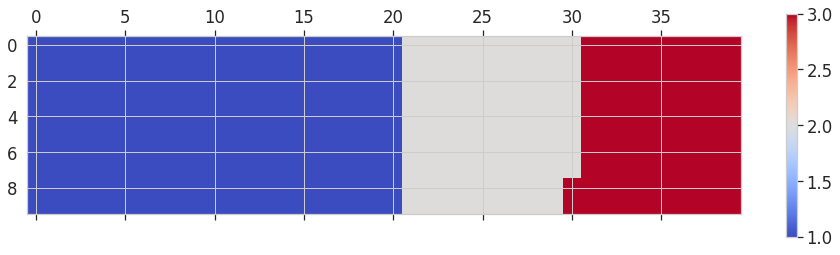

In [ ]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
plt.show()

<Figure size 432x288 with 0 Axes>

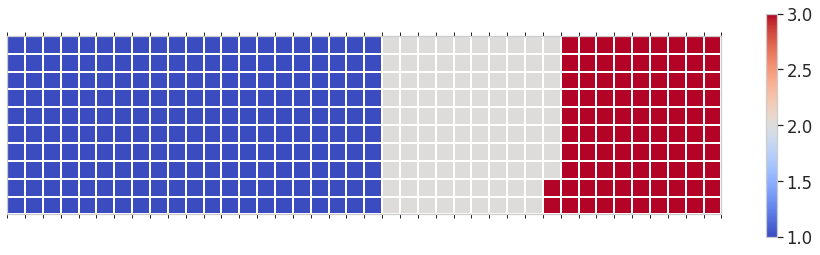

In [ ]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])
plt.show()

<Figure size 432x288 with 0 Axes>

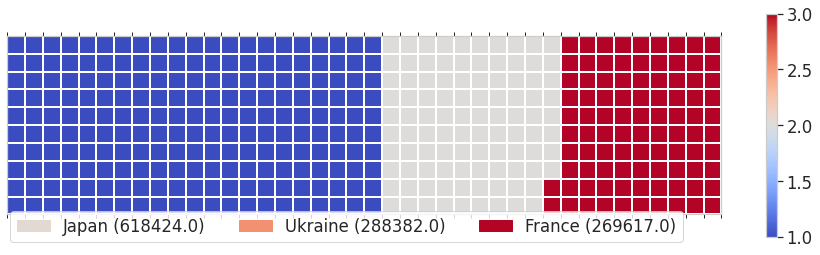

In [ ]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )
plt.show()

# **Word Clouds**



`Word` clouds are commonly used to perform high-level analysis and visualization of text data. 

In [ ]:
# install wordcloud
!pip3 install wordcloud==1.8.1

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [ ]:
# open the file and read it into a variable samudraPasai
samudraPasai = urllib.request.urlopen('https://raw.githubusercontent.com/AfkarSiddiq/VisualisasiData/main/SamudraPasai.txt').read().decode("utf-8")

In [ ]:
stopwords = set(STOPWORDS)

In [ ]:
# instantiate a word cloud object
Pasai = WordCloud(
    background_color='black',
    max_words=2000, #took 2000 words on first teks
    stopwords=stopwords
)

# generate the word cloud
Pasai.generate(samudraPasai)

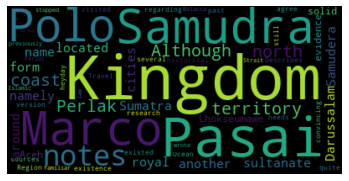

In [ ]:
# display the word cloud
plt.imshow(Pasai, interpolation='bilinear')
plt.axis('off')
plt.show()

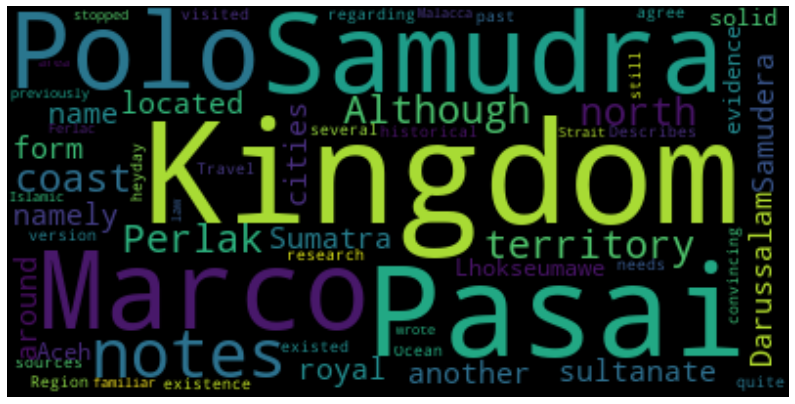

In [ ]:
fig = plt.figure(figsize=(14, 18))

# display the cloud
plt.imshow(Pasai, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# save mask to PasaiMask
PasaiMask = np.array(Image.open(urllib.request.urlopen('https://thumbs.dreamstime.com/z/anonymous-business-man-profile-picture-white-background-57594504.jpg')))

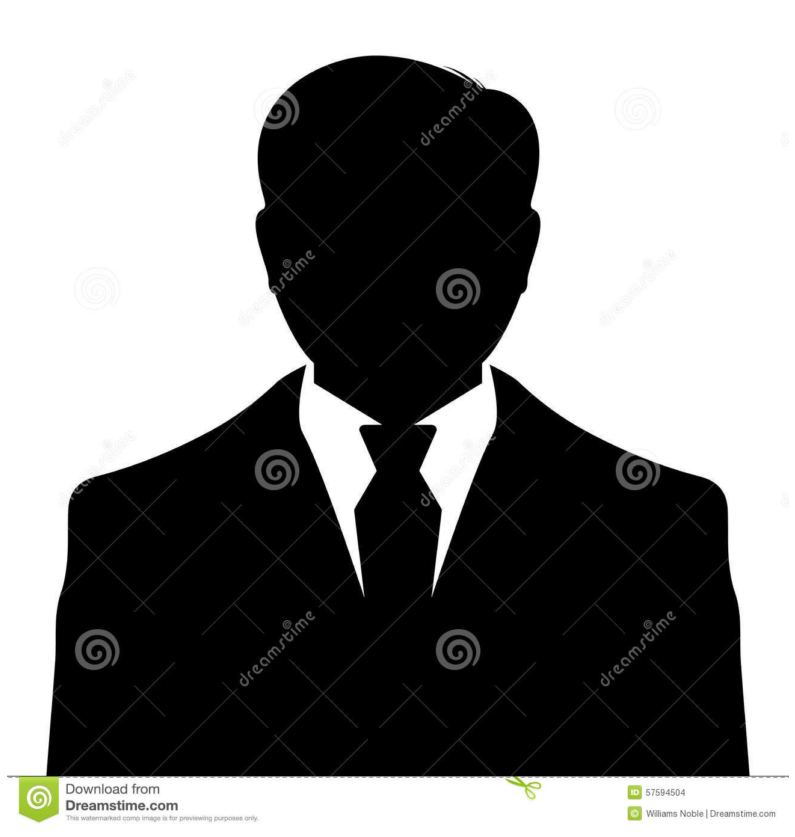

In [ ]:
fig = plt.figure(figsize=(14, 18))

plt.imshow(PasaiMask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

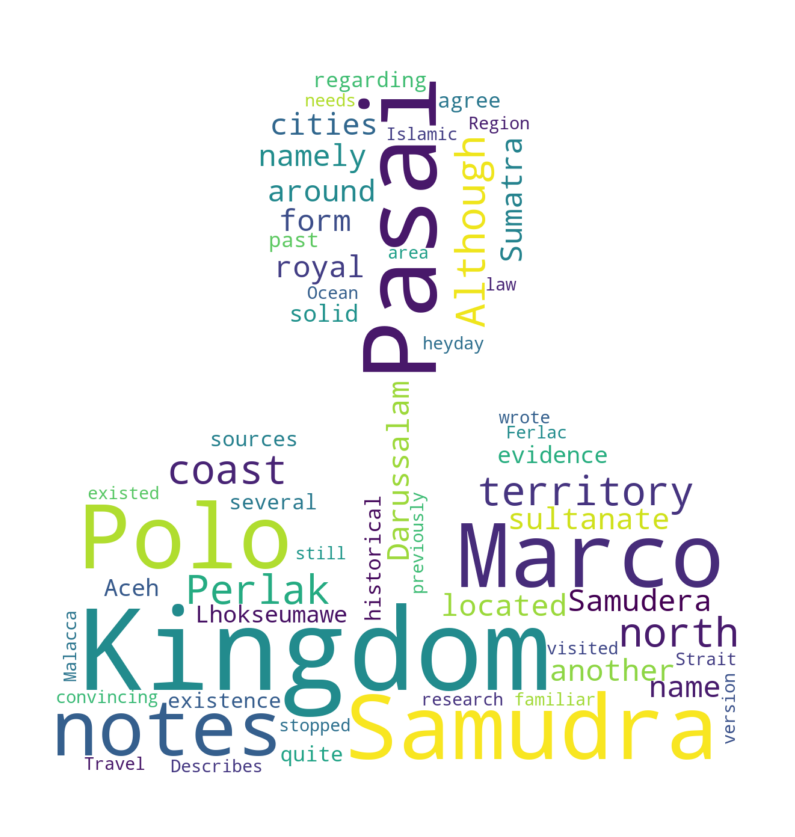

In [ ]:
# instantiate a word cloud object
Pasai = WordCloud(background_color='white', max_words=2000, mask=PasaiMask, stopwords=stopwords)

# generate the word cloud
Pasai.generate(samudraPasai)

# display the word cloud
fig = plt.figure(figsize=(14, 18))

plt.imshow(Pasai, interpolation='bilinear')
plt.axis('off')
plt.show()

# **Regression Plots**

regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset

In [ ]:
# import library
import seaborn as sns

print('Seaborn installed and imported!')

Seaborn installed and imported!


In [ ]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_sui[years].sum(axis=0))

# change the years to type float (useful for regression later on)
df_tot.index = map(float, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace=True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1985.0,197533.0
1,1986.0,189225.0
2,1987.0,186364.0
3,1988.0,181416.0
4,1989.0,186043.0


In [ ]:
df_sui.dtypes

year
1985     float64
1986     float64
1987     float64
1988     float64
1989     float64
1990     float64
1991     float64
1992     float64
1993     float64
1994     float64
1995     float64
1996     float64
1997     float64
1998     float64
1999     float64
2000     float64
2001     float64
2002     float64
2003     float64
2004     float64
2005     float64
2006     float64
2007     float64
2008     float64
Total    float64
dtype: object

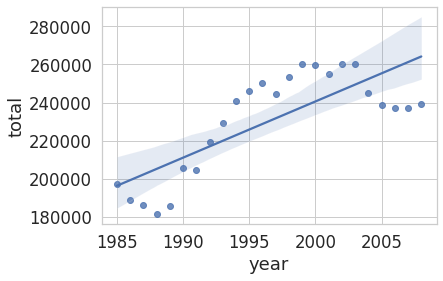

In [ ]:
sns.regplot(x='year', y='total', data=df_tot)

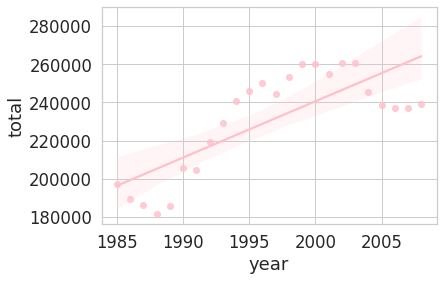

In [ ]:
sns.regplot(x='year', y='total', data=df_tot, color='pink')
plt.show()

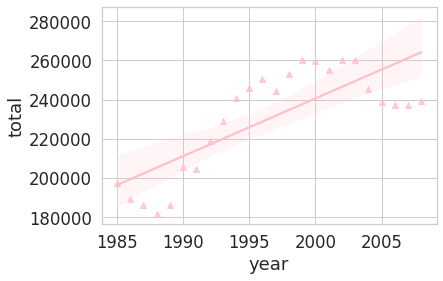

In [ ]:
ax = sns.regplot(x='year', y='total', data=df_tot, color='pink', marker='^')
plt.show()

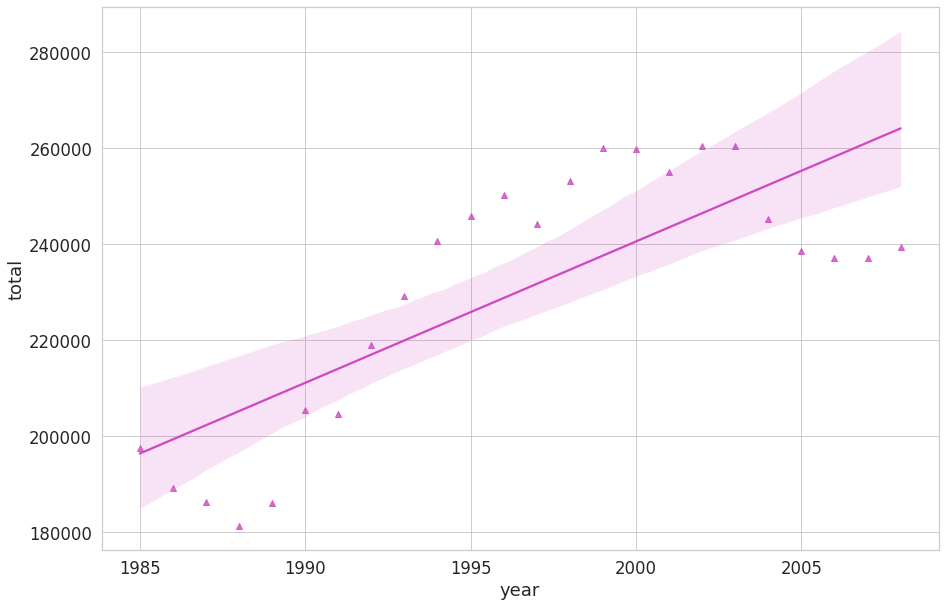

In [ ]:
plt.figure(figsize=(15, 10))
sns.regplot(x='year', y='total', data=df_tot, color='#CE49BF', marker='^')
plt.show()

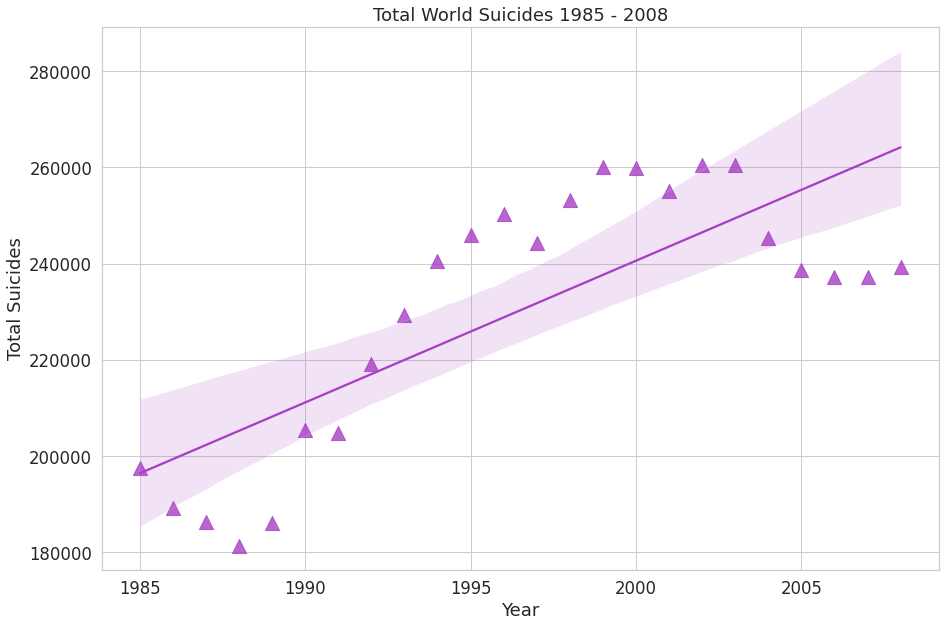

In [ ]:
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_tot, color = '#A63EC5', marker='^', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Suicides')
ax.set_title('Total World Suicides 1985 - 2008')
plt.show()